In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [59]:
data_csv = pd.read_csv('/home/sudeepgarg865660/iitr-deep-learning-spl-tf2/processing_sequences_using_rnn_cnns/BAJFINANCE.NS.csv')

In [60]:
data_csv.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-07-01,5.239737,5.540927,5.239737,5.412679,4.001257,21923.0
1,2002-07-02,5.523439,5.537041,5.421423,5.443769,4.024240,61044.0
2,2002-07-03,5.505950,5.545785,5.328151,5.466116,4.040760,34160.0
3,2002-07-04,5.501093,5.572018,5.417537,5.528297,4.086726,27892.0
4,2002-07-05,5.563274,5.656546,5.474860,5.590478,4.132692,58976.0


In [61]:
data_csv.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4783.000000,4783.000000,4783.000000,4783.000000,4783.000000,4.783000e+03
mean,881.251588,894.893722,866.828719,881.173791,875.709215,9.259254e+05
std,1529.944729,1552.382819,1507.610521,1530.507254,1527.947657,2.042785e+06
min,3.673548,4.081612,3.673548,4.064124,3.004354,0.000000e+00
25%,27.824630,28.569833,27.282487,27.908670,25.080693,7.395600e+04
50%,76.560600,77.969398,75.316978,76.405151,72.249939,2.433500e+05
75%,1047.750000,1065.525024,1025.000000,1047.719971,1037.340332,8.984685e+05
max,7949.850098,7999.000000,7804.649902,7899.049805,7899.049805,2.596005e+07


In [62]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4800 non-null   object 
 1   Open       4783 non-null   float64
 2   High       4783 non-null   float64
 3   Low        4783 non-null   float64
 4   Close      4783 non-null   float64
 5   Adj Close  4783 non-null   float64
 6   Volume     4783 non-null   float64
dtypes: float64(6), object(1)
memory usage: 262.6+ KB


In [63]:
data_csv = data_csv.dropna()

In [65]:
data_csv.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4783.000000,4783.000000,4783.000000,4783.000000,4783.000000,4.783000e+03
mean,881.251588,894.893722,866.828719,881.173791,875.709215,9.259254e+05
std,1529.944729,1552.382819,1507.610521,1530.507254,1527.947657,2.042785e+06
min,3.673548,4.081612,3.673548,4.064124,3.004354,0.000000e+00
25%,27.824630,28.569833,27.282487,27.908670,25.080693,7.395600e+04
50%,76.560600,77.969398,75.316978,76.405151,72.249939,2.433500e+05
75%,1047.750000,1065.525024,1025.000000,1047.719971,1037.340332,8.984685e+05
max,7949.850098,7999.000000,7804.649902,7899.049805,7899.049805,2.596005e+07


In [66]:
df1 = data_csv.reset_index()['Close']

In [67]:
df1.shape

(4783,)

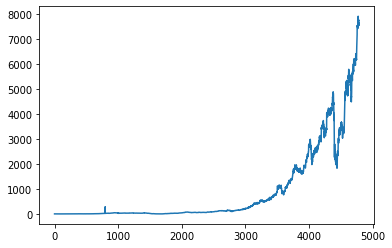

In [68]:
plt.plot(df1)

In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [70]:
print(df1)

[[1.70811583e-04]
 [1.74749525e-04]
 [1.77580056e-04]
 ...
 [9.79240000e-01]
 [9.80854949e-01]
 [9.78866382e-01]]


In [71]:
df1.shape

(4783, 1)

In [72]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4783 entries, 0 to 4799
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4783 non-null   object 
 1   Open       4783 non-null   float64
 2   High       4783 non-null   float64
 3   Low        4783 non-null   float64
 4   Close      4783 non-null   float64
 5   Adj Close  4783 non-null   float64
 6   Volume     4783 non-null   float64
dtypes: float64(6), object(1)
memory usage: 298.9+ KB


In [73]:
training_size = int(len(df1) * .7)
test_size  = len(df1) - training_size
train_data = df1[0:training_size,:]

In [74]:
train_data.shape

(3348, 1)

In [75]:
test_size

1435

In [76]:
test_data = df1[training_size:len(df1),:]
test_data.shape

(1435, 1)

In [77]:
training_size,test_size

(3348, 1435)

In [78]:
train_data

array([[0.00017081],
       [0.00017475],
       [0.00017758],
       ...,
       [0.06962785],
       [0.06946129],
       [0.06836375]])

In [79]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [81]:
time_step=50
X_train,y_train = create_dataset(train_data,time_step)
X_test,y_test = create_dataset(test_data,time_step)

In [82]:
print(X_train.shape)

(3297, 50)


In [83]:
print(y_train.shape)

(3297,)


In [84]:
print(X_test.shape), print(y_test.shape)

(1384, 50)
(1384,)


(None, None)

In [85]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [86]:
X_train.shape

(3297, 50, 1)

In [87]:
X_test.shape

(1384, 50, 1)

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [28]:
##from tensorflow import keras
##model=Sequential()
##model.add(LSTM(50,return_sequences=True,input_shape=[None, 1]))
##model.add(LSTM(50,return_sequences=True))
#model.add(LSTM(50))
##keras.layers.TimeDistributed(keras.layers.Dense(10))
##model.compile(loss='mean_squared_error',optimizer='adam')

In [89]:
from tensorflow import keras
model = keras.models.Sequential([
    keras.layers.LSTM(50, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(50, return_sequences=True),
    keras.layers.LSTM(50),
    keras.layers.Dense(1)])
model.compile(loss='mean_squared_error',optimizer='adam')



NameError: name 'model2' is not defined

In [49]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [90]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, None, 50)          10400     
_________________________________________________________________
lstm_17 (LSTM)               (None, None, 50)          20200     
_________________________________________________________________
lstm_18 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, None, 50)          10400     
_________________________________________________________________
lstm_11 (LSTM)               (None, None, 50)          20200     
_________________________________________________________________
lstm_12 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [91]:
print(X_train.shape)
print()

(3297, 50, 1)



In [92]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
52/52 [==============================] - 13s 155ms/step - loss: 4.0800e-05 - val_loss: 0.0048
Epoch 2/100
52/52 [==============================] - 7s 134ms/step - loss: 1.8105e-06 - val_loss: 0.0056
Epoch 3/100
52/52 [==============================] - 7s 143ms/step - loss: 1.7643e-06 - val_loss: 0.0056
Epoch 4/100
52/52 [==============================] - 7s 134ms/step - loss: 1.8649e-06 - val_loss: 0.0052
Epoch 5/100
52/52 [==============================] - 7s 136ms/step - loss: 1.9104e-06 - val_loss: 0.0050
Epoch 6/100
52/52 [==============================] - 7s 132ms/step - loss: 1.8516e-06 - val_loss: 0.0037
Epoch 7/100
52/52 [==============================] - 7s 135ms/step - loss: 2.1845e-06 - val_loss: 0.0050
Epoch 8/100
52/52 [==============================] - 9s 165ms/step - loss: 1.9499e-06 - val_loss: 0.0056
Epoch 9/100
52/52 [==============================] - 7s 135ms/step - loss: 1.9929e-06 - val_loss: 0.0050
Epoch 10/100
52/52 [==============================] - 

In [93]:
model.save("models/sudeep_forecasting_several_steps_11oct_final_without_time_distribution_layer.h5")

In [35]:
#model = keras.models.load_model("models/sudeep_forecasting_several_steps_11oct_main.h5")

In [94]:
import tensorflow as tf

In [37]:
tf.__version__

'2.6.0'

In [95]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [96]:
test_predict.shape

(1384, 1)

In [97]:
train_predict.shape

(3297, 1)

In [98]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [99]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

153.2174412127819

In [100]:
math.sqrt(mean_squared_error(y_test,test_predict))

2865.4964264268397

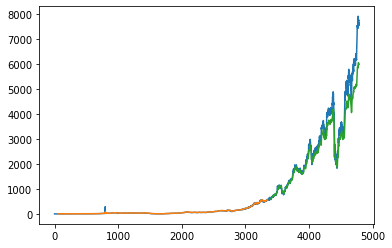

In [102]:
### Plotting 
# shift train predictions for plotting
look_back=50
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [103]:
len(test_data)

1435

In [104]:
x_input=test_data[1385:].reshape(1,-1)
x_input.shape

(1, 50)

In [105]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [106]:
temp_input

[0.810139021454167,
 0.7883530414727298,
 0.784857139248813,
 0.8015006022402944,
 0.8049521601152605,
 0.7909052819471479,
 0.7878716861981856,
 0.7839261561796873,
 0.7810066063627102,
 0.7807152450996321,
 0.7847304765745022,
 0.7792902900136369,
 0.8072320882528528,
 0.8114056481972739,
 0.8283784465549053,
 0.8431979794492551,
 0.8547369613652377,
 0.8836033725543627,
 0.8791511918386216,
 0.8775045770725828,
 0.8818934264511685,
 0.9070866199586209,
 0.9525585200361557,
 0.9519378853449756,
 0.949258982069584,
 0.9524191786814719,
 0.9502596049103591,
 0.9440467636232563,
 0.9447941228001325,
 0.9406712156391561,
 0.9425584772001059,
 0.9390119223194068,
 0.9385812815130298,
 0.9382456378390487,
 0.9404368774054019,
 0.9421658723081858,
 0.9892083772608937,
 0.9866497664139336,
 1.0000000000000002,
 0.9866181007453559,
 0.9868777963398565,
 0.954939753613975,
 0.9514058772869863,
 0.9707472924801118,
 0.9523368603561121,
 0.974160814440621,
 0.9778530807952205,
 0.979239999966758

In [107]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=50
i=0
while(i<10):
    
    if(len(temp_input)>50):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.7598462]
51
1 day input [0.78835304 0.78485714 0.8015006  0.80495216 0.79090528 0.78787169
 0.78392616 0.78100661 0.78071525 0.78473048 0.77929029 0.80723209
 0.81140565 0.82837845 0.84319798 0.85473696 0.88360337 0.87915119
 0.87750458 0.88189343 0.90708662 0.95255852 0.95193789 0.94925898
 0.95241918 0.9502596  0.94404676 0.94479412 0.94067122 0.94255848
 0.93901192 0.93858128 0.93824564 0.94043688 0.94216587 0.98920838
 0.98664977 1.         0.9866181  0.9868778  0.95493975 0.95140588
 0.97074729 0.95233686 0.97416081 0.97785308 0.97924    0.98085495
 0.97886638 0.75984621]
1 day output [[0.74568826]]
2 day input [0.78485714 0.8015006  0.80495216 0.79090528 0.78787169 0.78392616
 0.78100661 0.78071525 0.78473048 0.77929029 0.80723209 0.81140565
 0.82837845 0.84319798 0.85473696 0.88360337 0.87915119 0.87750458
 0.88189343 0.90708662 0.95255852 0.95193789 0.94925898 0.95241918
 0.9502596  0.94404676 0.94479412 0.94067122 0.94255848 0.93901192
 0.93858128 0.93824564 0.94043688 0.94

In [108]:
day_new=np.arange(1,51)
day_pred=np.arange(51,61)

In [109]:
len(df1)

4783

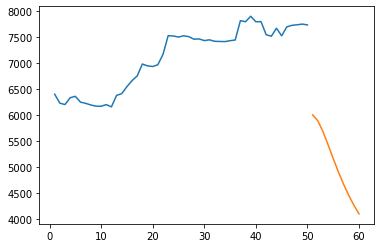

In [110]:
plt.plot(day_new,scaler.inverse_transform(df1[4733:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

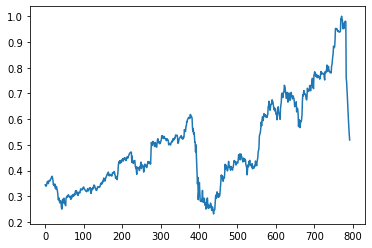

In [111]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[4000:])

In [112]:
df3=scaler.inverse_transform(df3).tolist()

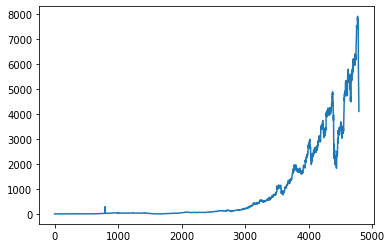

In [113]:
plt.plot(df3)